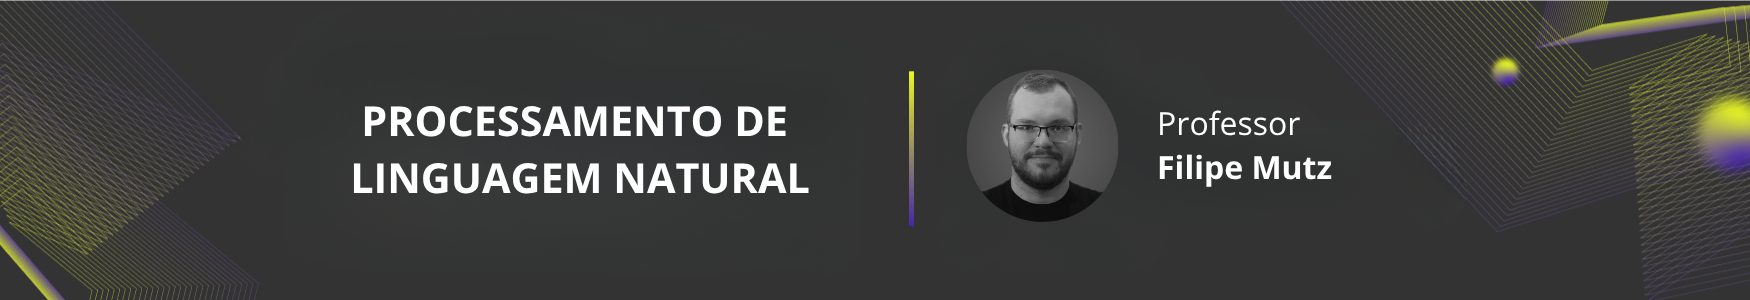

# 📝🤖 Classificação de Textos usando *Word Embeddings* e LSTMs


Este laboratório tem como objetivo praticar o uso de *word embeddings* pré-treinados e redes neurais baseadas em LSTMs para classificação de textos. Será utilizada novamente a base de dados [BBC News Archive](https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive). Para relembrar, ela possui 2225 notícias organizadas nas classes '*business*', '*entertainment*', '*politics*', '*sport*', '*tech*'.


**As atividades que devem ser realizadas estão nos tópicos:**
- Atividade 1: Pré-Processamento
- Atividade 2: Aplicação de Padding nas Sequências
- Atividade 3: Definição do Modelo
- Atividade 4: Análise dos Resultados

Todos eles valem a mesma pontuação (25 pontos).

## Preparação do Ambiente e Imports de Bibliotecas

In [ ]:

import os
import re

import torch
import unidecode
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import gensim.downloader
import matplotlib.pyplot as plt


from tqdm.auto import tqdm


# Ativa o tqdm nas operações do pandas
tqdm.pandas()

# configura o estilo dos plots
sns.set_style('darkgrid')


## Download do Dataset

Vamos utilizar a biblioteca *kagglehub* para fazer o download do dataset e a biblioteca pandas para ler o arquivo `.csv` em um *data frame* e embaralhá-lo.

In [ ]:

ds_path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
csv_path = os.path.join(ds_path, 'bbc-news-data.csv')
df = pd.read_csv(csv_path, sep= '\t')
df = df.sample(frac=1)
df

,category,filename,title,content
383,business,384.txt,Weak end-of-year sales hit Next,Next has said its annual profit will be £5m l...
1626,sport,314.txt,O'Driscoll saves Irish blushes,Two moments of magic from Brian O'Driscoll gu...
1654,sport,342.txt,Robinson out of Six Nations,England captain Jason Robinson will miss the ...
1618,sport,306.txt,Fit-again Betsen in France squad,France have brought flanker Serge Betsen back...
1540,sport,228.txt,Houllier praises Benitez regime,Former Liverpool manager Gerard Houllier has ...
...,...,...,...,...
356,business,357.txt,Soros group warns of Kazakh close,"The Open Society Institute (OSI), financed by..."
1050,politics,155.txt,Pakistani women 'must not hide',Hiding women away in the home hidden behind v...
1327,sport,015.txt,UK Athletics agrees new kit deal,UK Athletics has agreed a new deal with adida...
1188,politics,293.txt,Kilroy launches 'Veritas' party,Ex-BBC chat show host and East Midlands MEP R...


## Atividade 1: Pré-Processamento

Abaixo fazemos o download de um modelo de word embeddings pré-treinado. Fique à vontade para escolher outro modelo e avaliar sua performance.

In [ ]:
word_emb = gensim.downloader.load('glove-twitter-50')

Usando o modelo de *word embeddings*, mostre quais palavras são mais próximas ao termo "economy".

In [ ]:
# #### ADICIONE SUA RESPOSTA AQUI ####


[('economic', 0.8814244270324707),
 ('growth', 0.8684114813804626),
 ('government', 0.8332242369651794),
 ('housing', 0.8252440094947815),
 ('climate', 0.8131377696990967),
 ('debt', 0.8097053170204163),
 ('u.s.', 0.8094531297683716),
 ('unemployment', 0.8064247369766235),
 ('policy', 0.8047350645065308),
 ('consumer', 0.8019512891769409)]

Use o modelo de *word embeddings* para recuperar o embedding associado à palavra "championship".

In [ ]:
# #### ADICIONE SUA RESPOSTA AQUI ####


array([ 0.63824  ,  0.0032009,  1.3212   , -0.83268  ,  0.98743  ,
        0.49015  ,  0.97442  ,  1.0508   ,  0.39588  , -0.2689   ,
        0.49024  ,  0.27277  , -2.8832   ,  0.80975  ,  1.1724   ,
        0.0079772,  0.10551  ,  0.28507  ,  0.020685 ,  0.16869  ,
        0.65796  ,  0.20325  ,  1.7322   , -0.72003  , -0.17577  ,
        1.0044   ,  0.4387   , -0.84085  , -0.41587  , -0.11564  ,
        0.8604   , -1.0495   ,  0.064151 ,  0.024789 ,  1.3923   ,
       -0.47757  ,  0.23995  , -0.24162  ,  0.11971  ,  0.75676  ,
       -0.29533  , -0.21278  ,  0.99296  ,  0.4212   ,  0.74698  ,
       -0.02645  ,  0.06342  , -0.98884  ,  1.0443   ,  0.26223  ],
      dtype=float32)

Usando os conhecimentos da primeira semana, escreva uma função de pré-processamento que realize as operações indicadas nos comentários da função abaixo.


In [ ]:

MAX_SEQ_LENGTH = 200


def preprocessing(text):
    # Use a biblioteca `unidecode` para substituir caracteres com sinais
    # (acentos, cedilha, etc.) por suas versões sem sinal

    # #### ADICIONE SUA RESPOSTA AQUI ####


    # Use a biblioteca `re` para substituir caracteres não-alfanuméricos por espaço

    # #### ADICIONE SUA RESPOSTA AQUI ####


    # Converta o texto para minúsculo

    # #### ADICIONE SUA RESPOSTA AQUI ####


    # separe o texto em palavras usando o método `split`

    # #### ADICIONE SUA RESPOSTA AQUI ####


    # Vamos truncar a sequencia em um tamanho máximo para reduzir o custo computacional

    # #### ADICIONE SUA RESPOSTA AQUI ####


    # Converta as palavras em word embeddings usando o modelo da biblioteca gensin criado acima.
    # Lembre-se de verificar se as palavras existem no modelo e ignore aquelas que não existem.
    # Por fim, lembre-se de converter o resultado em um torch.tensor.

    # #### ADICIONE SUA RESPOSTA AQUI ####

    return embds


# executa a função de pré-processamento para o primeiro texto
print(preprocessing(df['content'].iloc[0]))


tensor([[ 0.2185,  0.2015,  0.3594,  ..., -0.4240, -0.2034,  0.8135],
        [-0.2947,  0.0772, -0.0316,  ..., -0.4668, -0.6816, -0.7655],
        [ 0.1255,  0.7760,  0.5835,  ..., -0.6975, -0.3672, -0.1166],
        ...,
        [-0.4435, -0.2779, -0.8679,  ..., -0.4613, -0.7974,  0.6535],
        [ 0.2510,  0.8815, -1.1428,  ..., -0.0881, -0.5592,  0.4585],
        [-0.0947,  0.1341,  0.2144,  ...,  0.4706, -0.4450,  0.1328]])


A célula abaixo aplica a função de pré-processamento para toda a base de dados.

In [ ]:
x = [preprocessing(t) for t in df['content']]
x[:5]

[tensor([[ 0.2185,  0.2015,  0.3594,  ..., -0.4240, -0.2034,  0.8135],
         [-0.2947,  0.0772, -0.0316,  ..., -0.4668, -0.6816, -0.7655],
         [ 0.1255,  0.7760,  0.5835,  ..., -0.6975, -0.3672, -0.1166],
         ...,
         [-0.4435, -0.2779, -0.8679,  ..., -0.4613, -0.7974,  0.6535],
         [ 0.2510,  0.8815, -1.1428,  ..., -0.0881, -0.5592,  0.4585],
         [-0.0947,  0.1341,  0.2144,  ...,  0.4706, -0.4450,  0.1328]]),
 tensor([[ 0.3144,  0.3171,  0.4017,  ..., -0.1690,  0.1092,  0.7550],
         [ 0.3531,  0.0330,  0.3438,  ...,  0.0887,  0.6333, -0.3900],
         [ 0.3022,  0.2984,  0.4285,  ...,  0.0577,  0.4448,  0.0131],
         ...,
         [-0.4320, -0.1896, -0.0283,  ..., -0.3757,  0.1608, -0.7450],
         [ 0.2338, -0.1764,  1.0491,  ...,  0.5866,  0.3224, -0.3261],
         [ 0.2532, -0.0149,  0.5937,  ..., -0.2893,  0.4549,  0.1866]]),
 tensor([[ 0.5375, -0.2938,  0.7647,  ..., -0.1556,  0.2783, -0.1549],
         [-0.2443, -0.2860,  0.4840,  ..., -0

## Atividade 2: Aplicação de Padding nas Sequências

A célula abaixo utiliza a operação de *padding* para uniformizar o tamanho das sequências armazenadas a variável `x`. [Leia mais sobre a função pad_sequence](https://docs.pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_sequence.html).

In [ ]:
from torch.nn.utils.rnn import pad_sequence

x_padded = ... # #### ADICIONE SUA RESPOSTA AQUI ####

x_padded.shape

torch.Size([2225, 200, 50])

## Divisão dos Dados em Conjuntos de Treino e Teste

A célula abaixo transforma os nomes das classes em labels inteiros.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y = label_enc.fit_transform(df['category'])
y = y.astype(np.int64)
y = torch.tensor(y)
y

tensor([0, 3, 3,  ..., 3, 2, 3])

A lista de classes identificadas é listada abaixo.

In [ ]:
label_enc.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

A célula abaixo divisão os dados em conjuntos de treino e teste. Não vamos usar um conjunto de validação para manter o exemplo simples.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_padded, y,
    test_size=0.2,
    random_state=42,
)

train_ds = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

test_ds = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_ds, batch_size=64)

print("train size:", len(train_ds), "test size:", len(test_ds))

train size: 1780 test size: 445


## Atividade 3: Definição do Modelo

Complete a definição da classe adicionando os itens especificados nos comentários abaixo.

In [ ]:
from torch import nn

n_classes = len(label_enc.classes_)


class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Crie uma camada LSTM

        self.lstm = ... # #### ADICIONE SUA RESPOSTA AQUI ####

        # Crie uma camada totalmente conectada para classificação.
        # Lembre-se que o tamanho da entrada deve ser igual ao tamanho da LSTM.

        self.fc = ... # #### ADICIONE SUA RESPOSTA AQUI ####


    def forward(self, sequence):
        # Passa a sequência de entrada pela LSTM
        _, (hidden, cell) = self.lstm(sequence)

        # A saída da LSTM tem o shape [seq_length=1, batch_size, hidden_size].
        # Seq_length=1 porque apenas o estado da última posição da sequência é retornado.
        # A linha abaixo remove a dimensão da sequência fazendo com que o shape se torne [batch_size, hidden_size].
        hidden = hidden.squeeze(0)

        # passe a saída da LSTM pela camada totalmente conectada
        prediction = self.fc(hidden)

        return prediction

net = Model()
net(x_padded[:3])

tensor([[ 0.0161, -0.0085, -0.0282,  0.0899, -0.1662],
        [ 0.0161, -0.0090, -0.0296,  0.0903, -0.1661],
        [ 0.0266, -0.0098, -0.0262,  0.1159, -0.1406]],
       grad_fn=<AddmmBackward0>)

## Treinamento e Avaliação

A célula abaixo realiza o treinamento do modelo. Por simplicidade, utilizamos o conjunto de teste para avaliar a generalização do modelo ao longo do treinamento. **Em aplicações reais, o correto seria utilizar um conjunto independente de validação**.

In [ ]:
import torch.optim as optim

net = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-2)

history = []
n_epochs = 40

# repete por um número de épocas
for epoch in range(n_epochs):
    running_loss = 0.0

    # epoca de treinamento: itera sobre os batches do conjunto de treino
    net.train()
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    running_loss /= len(train_loader)

    # avaliação no conjunto de teste
    net.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(train_loader)

    history.append([running_loss, test_loss])

    if epoch % max(1, n_epochs // 20)  == 0:
        print(f'[{epoch + 1}] loss: {running_loss:.4f} test loss: {test_loss:.4f}')

print('Finished Training')

[1] loss: 1.4785 test loss: 0.3207
[3] loss: 0.9641 test loss: 0.2268
[5] loss: 1.0487 test loss: 0.2096
[7] loss: 0.6423 test loss: 0.1194
[9] loss: 0.3532 test loss: 0.0912
[11] loss: 0.2110 test loss: 0.0431
[13] loss: 0.1473 test loss: 0.0463
[15] loss: 0.1030 test loss: 0.0559
[17] loss: 0.0812 test loss: 0.0308
[19] loss: 0.0490 test loss: 0.0316
[21] loss: 0.0505 test loss: 0.0322
[23] loss: 0.0616 test loss: 0.0421
[25] loss: 0.0983 test loss: 0.0339
[27] loss: 0.0303 test loss: 0.0358
[29] loss: 0.0132 test loss: 0.0360
[31] loss: 0.0078 test loss: 0.0418
[33] loss: 0.0053 test loss: 0.0474
[35] loss: 0.0033 test loss: 0.0516
[37] loss: 0.0023 test loss: 0.0519
[39] loss: 0.0018 test loss: 0.0549
Finished Training


A célula abaixo mostra a evolução da função de perda nos conjuntos de treino e teste. É esperado que ambas as curvas reduzam.

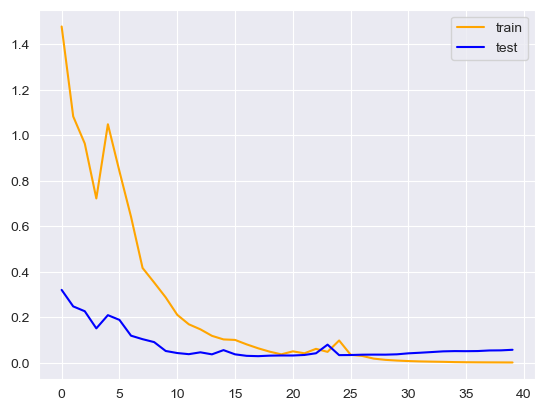

In [ ]:
import matplotlib.pyplot as plt

history = np.array(history)

plt.plot(history[:, 0], '-', color='orange', label='train')
plt.plot(history[:, 1], '-', color='blue', label='test')
plt.legend()

A célula abaixo mostra as métricas de performance para o conjunto de teste. É possível alcançar uma acurácia superior a `95%`.

In [ ]:
from sklearn.metrics import classification_report

all_labels = []
preds = []

net.eval()

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        cls = np.argmax(outputs, axis=-1)
        all_labels += list(labels)
        preds += list(cls)

print(classification_report(all_labels, preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       102
           1       0.99      0.96      0.98        82
           2       0.95      0.89      0.92        79
           3       1.00      0.99      1.00       113
           4       0.96      1.00      0.98        69

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



A célula abaixo faz uma avaliação qualitativa do modelo do com um conjunto de textos. Verifique se o seu modelo identificou as classes corretamente.

In [ ]:

softmax = torch.nn.Softmax(dim=-1)
net.eval()

def avalia_sentenca(texto):
    embds = preprocessing(texto)

    padded = torch.nn.functional.pad(embds, (0, 0, 0, MAX_SEQ_LENGTH - len(embds)), value=0.0)

    with torch.no_grad():
        padded = torch.unsqueeze(padded, 0)
        logits = net(padded)
        probs = softmax(logits)
        probs = np.squeeze(probs)
        cls = np.argmax(probs)

    print(f"Frase: {texto}")
    print(f"\nProbs: {probs}")
    print(f"Class: {label_enc.classes_[cls]}\n")
    print("------------\n")


# sport
avalia_sentenca("Liverpool have signed 18-year-old defender Giovanni Leoni from Italian side Parma for a fee of £26m plus add-ons. Leoni, who Reds boss Arne Slot confirmed the club had agreed a deal for earlier this week, has signed a contract until 2031. The Italy Under-19s centre-back began his career at Padova and had a short spell at Sampdoria before joining Parma last summer. Leoni played 17 games in his first campaign in Serie A last season, attracting interest from both Milan clubs, but has opted for a move abroad.")

# business
avalia_sentenca("Shares in Intel jumped by more than 7% on Thursday, following reports that the Trump administration is in talks to take a stake in the chipmaker. The reported deal would support the technology firm's plans to build a manufacturing hub in Ohio, according to Bloomberg, which said the size of the potential stake is not clear. White House spokesman Kush Desai said 'discussion about hypothetical deals should be regarded as speculation unless officially announced by the administration'.")

# tech
avalia_sentenca("Apple on Tuesday released its sixth developer beta of its mobile operating system, iOS 26, along with updates for iPad, Apple Watch, Apple TV, Mac, and others. As the new software gets closer to its September public launch date, the changes and tweaks aren't as significant, but there are still some surprises to be found. In beta 6, that includes a new selection of ringtones, a final decision on the Camera swiping direction controversy, a new onboarding experience, and other updates. There was quite a bit of backlash over the way Apple changed how the Camera mode switcher responds to touch. Users complained that the change, introduced in prior betas, broke their muscle memory, since the swipe gesture on this interface would reverse the scroll direction they were used to — which was the same design paradigm that all other native Apple apps use. In beta 5, Apple responded to these complaints by introducing a new Settings toggle that would allow you to switch back to 'Classic Mode', which would once again make the Camera app work like all others.")

# politics
avalia_sentenca("Watching the president of France and the prime minister close up was to see two men under the cosh, behind in the opinion polls and fighting for what they see as the essence of their political creed. It boils down to this - how do Sir Keir Starmer and Emmanuel Macron make the case for what they see as the virtues of patience, nuance, subtleties and trade-offs in an era of growing impatience at the perceived repeated failures of those in high office? There were just two lecterns and two speakers at the news conference the leaders hosted, but two other parties hovered in the air. Reform UK and National Rally, the party of Jordan Bardella and Marine Le Pen, were never mentioned explicitly. Nor were their leaders. But they were repeatedly mentioned implicitly.")


Frase: Liverpool have signed 18-year-old defender Giovanni Leoni from Italian side Parma for a fee of £26m plus add-ons. Leoni, who Reds boss Arne Slot confirmed the club had agreed a deal for earlier this week, has signed a contract until 2031. The Italy Under-19s centre-back began his career at Padova and had a short spell at Sampdoria before joining Parma last summer. Leoni played 17 games in his first campaign in Serie A last season, attracting interest from both Milan clubs, but has opted for a move abroad.

Probs: tensor([1.9162e-05, 3.8098e-05, 7.3640e-05, 9.9981e-01, 5.9611e-05])
Class: sport

------------

Frase: Shares in Intel jumped by more than 7% on Thursday, following reports that the Trump administration is in talks to take a stake in the chipmaker. The reported deal would support the technology firm's plans to build a manufacturing hub in Ohio, according to Bloomberg, which said the size of the potential stake is not clear. White House spokesman Kush Desai said 'discus

## Atividade 4: Análise dos Resultados

Responda as seguintes perguntas apresentando uma justificativa breve (poucas frases).

1. Considerando o gráfico de evolução da função de perda, responda as seguintes perguntas:
   1. Existem indícios de *underfitting* (subajuste) do modelo?
   2. Existem indícios de *overfitting* (superajuste) do modelo?

2. Considerando os resultados da análise quantitativa, responda as seguintes perguntas:
   1. O modelo apresentou uma boa generalização?
   2. Em quais classes o modelo apresentou melhor e pior performance de acordo com o `f1-score`?

3. Quais conclusões podem ser tiradas com a análise qualitativa?



---

*ADICIONE SUA RESPOSTA NESTA CÉLULA DE MARKDOWN*

---
